# SI 618: Data Manipulation and Analysis
## 06 - Categorical Data & Text Processing 
### Pivoting, contingency tables, crosstabs, mosaic plots and chi-squared

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


## Overview for today
* Review HW1
* Project proposal review 
* Categorical Data: contingency tables, crosstabs, mosaic plots, chi-squared
* Text Processing: regular expressions

## Q0: What did you find confusing from last class?

NA

# Categorical Data

## Contingency tables, crosstabs, and chi-square

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Let's generate a data frame to play with:

In [2]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [5]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


One of the most basic transformations we can do is a crosstab:

In [6]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


Notice how similar it is to pivoting.  In fact, go ahead and use ```pivot_table``` to do the same sort of transformation:

### <font color="magenta">Q1: Use ```pivot_table``` to create a DataFrame similar to the one from the ```crosstab``` above:

In [8]:
pd.pivot_table(data = df, columns = 'vehicleClass', index = 'color', aggfunc = len)

make           
vehicleClass  car  suv truck
color                       
black         2.0  2.0   2.0
green         4.0  6.0   2.0
red           2.0  4.0   NaN

As usual, we would like to visualize our results:

In [9]:
import seaborn as sns

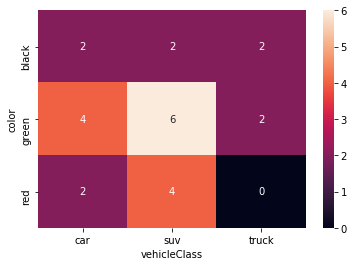

In [10]:
sns.heatmap(ct,annot=True) # shift+tab, can see the definition of the function, put in the (

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [13]:
titanic = pd.read_csv('data/titanic.csv')

,passtype,age,status,sex
0,third,child,dead,male
1,third,child,dead,male
2,third,child,dead,male
3,third,child,dead,male
4,third,child,dead,male


Let's create a crosstab of the data:

In [14]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


Now let's use our knowledge of data manipulation with pandas to generate some percentages totals:

### <font color="magenta">Q2: Generate this:</font>

![](assets/samplect.png)

In [16]:
pd.pivot_table(data = titanic, columns = 'status', index = 'passtype', aggfunc = [len, ])

len                
           age        sex     
status   alive dead alive dead
passtype                      
crew       212  673   212  673
first      203  122   203  122
second     118  167   118  167
third      178  528   178  528

In [30]:
table = pd.crosstab(titanic.passtype,titanic.status,margins=True)
table.alive = np.round(table.alive / table.All * 100,decimals=2) 
table.dead = np.round(table.dead / table.All * 100,decimals=2)  
table.All  = np.round(table.All / table.All * 100,decimals=2)   
table.alive = ct.alive.astype('str') + " (" + table.alive.astype('str') + "%)"
table.dead = ct.dead.astype('str') + " (" + table.dead.astype('str') + "%)"
table.All = ct.All.astype('str') + " (" + table.All.astype('str') + "%)"
table

status,alive,dead,All
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
All,711 (32.3%),1490 (67.7%),2201 (100.0%)


### <font color="magenta">Q3: Is this what we would have expected?</font>

In [27]:
# fill in the correct numbers on the next two lines (where np.NaN is right now)
expectedAlive = ctExt.total * .323
expectedDead = ctExt.total * .677

NameError: name 'ctExt' is not defined

### Now generate a similar matrix for the *expected* (as oppposed to observed) values:

In [ ]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['total'] = ctExpected.sum(axis=1)
ctExpected.loc['total'] = ctExpected.sum(axis=0)
alivePercent = np.round(ctExpected.alive/ctExpected.total * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.total * 100,decimals=2)
totalPercent = np.round(ctExpected.total/ctExpected.total * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.total = ctExpected.total.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [ ]:
detailExp

In [ ]:
detailCT

So, there we have the expected and observed values, along with their proportions.

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

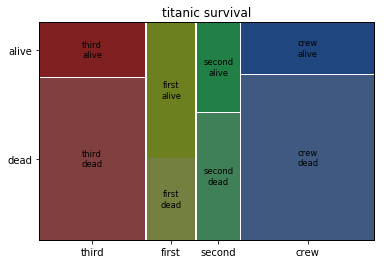

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

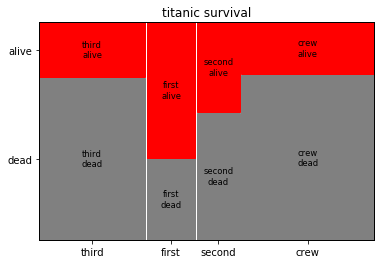

In [33]:
# slightly easier to read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

## Let's talk about $\chi^2$

In [34]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.40110361683327
p-val =  6.705773035354302e-37
degree of freedom =  8
Expected:


,0,1,2
0,285.885961,599.114039,885.0
1,104.986370,220.013630,325.0
2,92.064970,192.935030,285.0
3,228.062699,477.937301,706.0
4,711.000000,1490.000000,2201.0


## Let's apply these ideas to another dataset

For this component, we'll use the Comic Characters data set:

In [36]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

In [37]:
comic_characters.groupby(['Identity','publisher'])['appearances'].mean().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


In [40]:
comic_characters.groupby(['Identity','publisher'])['appearances'].mean() # change the format by unstack()

Identity                       publisher
Identity Unknown               DC            3.000000
Known to Authorities Identity  Marvel       74.400000
No Dual Identity               Marvel       24.402013
Public Identity                DC           28.287166
                               Marvel       23.407615
Secret Identity                DC           32.655157
                               Marvel       17.379794
Name: appearances, dtype: float64

Alternatively, we can use .pivot_table(). For example:

In [42]:
avg_appearance_per_identity = comic_characters.pivot_table(index='Identity', 
                                                          columns='publisher', 
                                                          values='appearances',
                                                          aggfunc='mean')
avg_appearance_per_identity.fillna(0).head()

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

### Let's warm up with a few groupby and pivot_table exercises:

### <font color="magenta">Q4: What is the total number of appearances of characters for each publisher?

In [65]:
comic_characters.groupby('publisher')['appearances'].sum()

publisher
DC        154532.0
Marvel    260270.0
Name: appearances, dtype: float64

### <font color="magenta">Q5: What is the total number of appearances of characters by each publisher in each year? Output a table.

In [67]:
# comic_characters.head()
# comic_characters.groupby(['publisher', 'year'])['appearances'].sum().unstack().fillna(0)
b = comic_characters.groupby(['year', 'publisher'])['appearances'].sum().unstack().fillna(0)
b.loc[1963.0]

publisher
DC         2209.0
Marvel    25046.0
Name: 1963.0, dtype: float64

### <font color="magenta">Q6: Construct a contingency table of sex and character alignment normalized by all values.

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

In [74]:
table = pd.crosstab(comic_characters.sex , comic_characters['align'], normalize = True) # align is a reserved function, conflicted
table # margins=True, in crosstab : add them up to a All column

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.001045,0.000523,0.000679,0.000000
Female Characters,0.082197,0.130114,0.043685,0.000052
Genderfluid Characters,0.000000,0.000052,0.000052,0.000000
Genderless Characters,0.000575,0.000314,0.000157,0.000000
Male Characters,0.395099,0.251293,0.094006,0.000105
Transgender Characters,0.000052,0.000000,0.000000,0.000000


### <font color="magenta">Q7: Create a mosaic plot of character alignment and alive status.

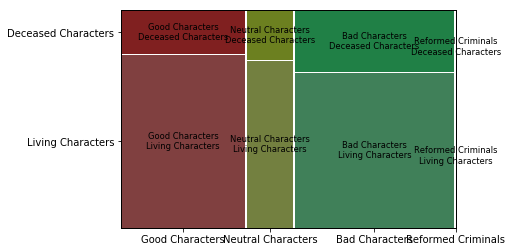

In [77]:
# props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(comic_characters, ['align','alive']) # ,title='character survival',properties=props

### <font color="magenta">Q8: Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

In [88]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(comic_characters.alive, comic_characters['align'])
ct
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  155.77673609805584
p-val =  1.4943918171359309e-33
degree of freedom =  3
Expected:


,0,1,2,3
0,2363.193534,1835.44478,681.624263,0.737423
1,7250.806466,5631.55522,2091.375737,2.262577


# BREAK!

# Text Processing I: Basics and Regular Expressions

First, a slideshow.... 

As usual, let's load up some data:

In [89]:
import pandas as pd

In [90]:
reviews = pd.read_csv('data/amazon_food_reviews.zip')

Let's take a really small sample, just so we can experiment with the various 

In [91]:
reviews_sample = reviews.head(10)

In [92]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [94]:
reviews_sample['Text']

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

Let's review some basic string functionality from Pandas that can be applied to any Series or Index:

In [95]:
reviews_sample.ProfileName.str.lower()

0                         delmartian
1                             dll pa
2    natalia corres "natalia corres"
3                               karl
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
7                 pamela g. williams
8                           r. james
9                      carol a. reed
Name: ProfileName, dtype: object

In [96]:
reviews_sample.ProfileName.str.upper()

0                         DELMARTIAN
1                             DLL PA
2    NATALIA CORRES "NATALIA CORRES"
3                               KARL
4      MICHAEL D. BIGHAM "M. WASSIR"
5                     TWOAPENNYTHING
6                  DAVID C. SULLIVAN
7                 PAMELA G. WILLIAMS
8                           R. JAMES
9                      CAROL A. REED
Name: ProfileName, dtype: object

In [102]:
reviews_sample.Summary.str.len()  # .max() find the max value 

0    21
1    17
2    21
3    14
4    11
5    10
6    45
7    22
8    10
9    16
Name: Summary, dtype: int64

Remember, the ```columns``` attribute of a DataFrame is an Index object, which means that we can use str operators on the column names:

In [98]:
reviews_sample.columns

Index(['Id', 'ProductId', 'User Id ', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [103]:
reviews_sample.columns.str.lower() # columns represents index

Index(['id', 'productid', 'user id ', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

Notice that the "User Id" column of the dataframe looks weird:  it has a space in the middle *and* at the end.  Columns that are named like that will invariable trip us up in downstream (i.e. later) analyses, so it's wise to correct them now.  Something like the following can help:

In [100]:
reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

Index(['id', 'productid', 'user_id', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

And we can assign that back to the columns attribute to actually rename the columns:


In [106]:
reviews_sample.columns = reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

In [105]:
reviews_sample

,id,productid,user_id,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Splitting and Replacing Strings

Sometimes, we want to split strings into lists.  We might want to do that with the "summary" column:

In [107]:
reviews_sample.productid.str.split('00')

0    [B, 1E4KFG0]
1    [B, 813GRG4]
2    [B, 0LQOCH0]
3    [B, 0UA0QIQ]
4    [B, 6K2ZZ7K]
5    [B, 6K2ZZ7K]
6    [B, 6K2ZZ7K]
7    [B, 6K2ZZ7K]
8    [B, 0E7L2R4]
9    [B, 171APVA]
Name: productid, dtype: object

In [109]:
reviews_sample.productid.str.split('00').str.get(1) # access the element, str.get(1) 

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

Equivalently:

In [110]:
reviews_sample.productid.str.split('00').str[1]

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

In [113]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

### Replace (regex time!)

In [111]:
reviews_sample.summary.str.lower().str.replace('dog','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

In [112]:
reviews_sample.summary.str.lower().str.replace('dog|taffy','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                     great health
5                                      nice health
6    great!  just as good as the expensive brands!
7                          wonderful, tasty health
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

### Extracting Substrings

In [114]:
reviews_sample.summary.str.extract(r'(Dog)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,Dog


In [115]:
reviews_sample.summary.str.extract(r'(Dog|Taffy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,Taffy
6,NaN
7,NaN
8,NaN
9,Dog


In [118]:
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)') # match any character in the []: T or t

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,taffy
5,Taffy
6,NaN
7,taffy
8,NaN
9,Dog


In [119]:
# returns a Series
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)', expand = False)

0      Dog
1      NaN
2      NaN
3      NaN
4    taffy
5    Taffy
6      NaN
7    taffy
8      NaN
9      Dog
Name: summary, dtype: object

In [120]:
reviews_sample.summary.str.extractall(r'(Dog|[Tt]affy)')

,,0
,match,
0,0,Dog
4,0,taffy
5,0,Taffy
7,0,taffy
9,0,Dog


In [121]:
reviews_sample.summary.str.extractall(r'(as)')
# Matches whatever regular expression is inside the parentheses

0
  match    
1 0      as
6 0      as
  1      as
7 0      as

### Testing for Strings that Match or Contain a Pattern

In [ ]:
reviews_sample.text

In [ ]:
pattern = r'[Gg]ood'

In [ ]:
reviews_sample.text.str.contains(pattern)

In [ ]:
reviews_sample.text.str.match(pattern)

In [ ]:
pattern = r'.*[Gg]ood.*'

In [ ]:
reviews_sample.text.str.match(pattern)

#### Helpful resources:
- Pandas text documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Regex Cheat Sheet: https://regexr.com/

### <font color="magenta">Q9: How many rows from the Amazon Food Reviews data set contain HTML tags in the ```text``` column?</font>

In [ ]:
# Add your code here

### <font color="magenta">10: Remove all HTML tags from the Amazon Food Reviews text column and save the results to a column called text_no_html.

In [ ]:
# Add your code here

### <font color="magenta">Q11: Replace the following words in the text column with the word 'POSITIVE_ADJ' (denoting positive adjectives) and save the results to a column called ```text_coded```. 
    
In all cases, you should find words that are either all lowercase, all uppercase, or words that start with an uppercase letter with the remaining letters lowercase:
    
good, great, excellent, best, perfect

In [ ]:
# Add your code here

### <font color="magenta">Q12: How many rows contain multiple positive adjectives?

In [ ]:
# Add your code here